**Essa Kirana**

**1. Import Library**

In [ ]:
# Import library in one cells

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder


**1. Data Input**

In [ ]:
# Load and convert data to DataFrame
data_iris = load_iris()
df = pd.DataFrame(data=data_iris.data, columns=data_iris.feature_names)
df['species'] = data_iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**2. Load Data Info**

In [ ]:
# DataFrame Shape
df.shape

(150, 5)

In [ ]:
# DataFrame Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


**3. Load and Describing the Target**

In [ ]:
# Load Target Unique Info
df['species'].unique()


array([0, 1, 2])

In [ ]:
# Load Target Counts
target_counts = df['species'].value_counts()
print(target_counts)

species
0    50
1    50
2    50
Name: count, dtype: int64


In [ ]:
# Desciribing Data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**4. Pre-Processing Data Before Visualizing**

In [ ]:
# Data Cleaning

## Checking Missing Value
print("Checking Missing Value: ")
df.isnull().sum()

Checking Missing Value: 


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


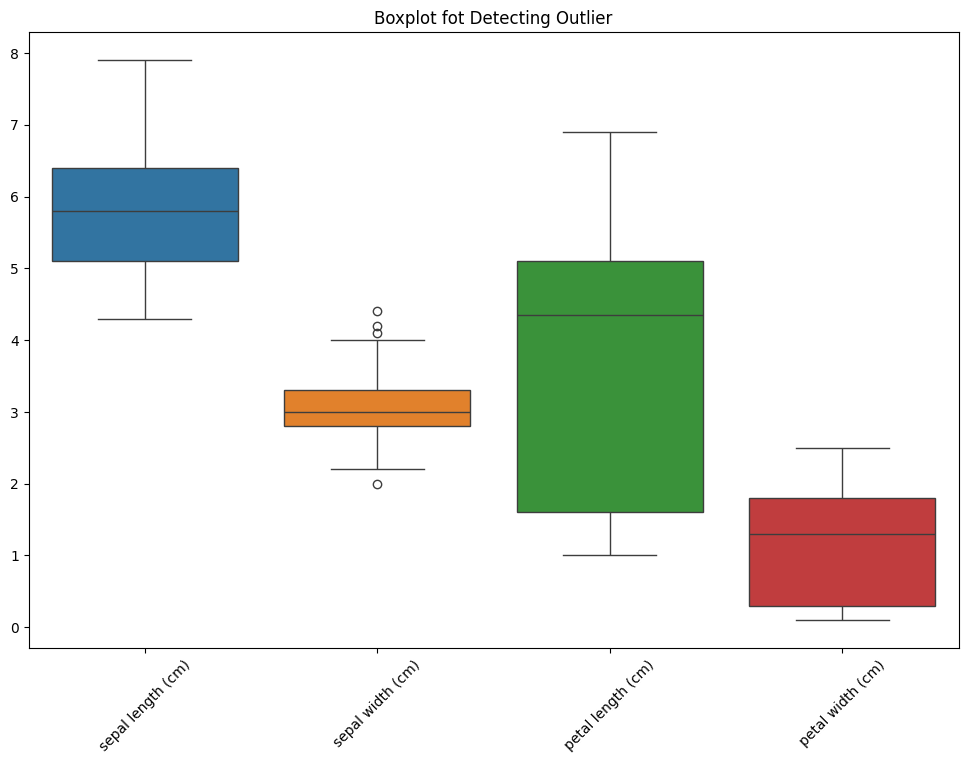


Outlier in feature 'sepal length (cm)':
No outlier detected.

Outlier in feature 'sepal width (cm)':
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5               0.4   
32                5.2               4.1                1.5               0.1   
33                5.5               4.2                1.4               0.2   
60                5.0               2.0                3.5               1.0   

    species  
15        0  
32        0  
33        0  
60        1  

Outlier in feature 'petal length (cm)':
No outlier detected.

Outlier in feature 'petal width (cm)':
No outlier detected.


In [ ]:
## Checking Outlier

plt.figure(figsize=(12, 8))
sns.boxplot(data=df.iloc[:, :-1])
plt.title("Boxplot fot Detecting Outlier")
plt.xticks(rotation=45)
plt.show()

### IQR Method
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

### Checking Outlier in Every Feature Columns
outlier_dict = {}
for col in df.columns[:-1]:  # Kolom fitur saja, tanpa target
    outliers = detect_outliers(df, col)
    outlier_dict[col] = outliers

### Load the Results
for feature, outliers in outlier_dict.items():
    print(f"\nOutlier in feature '{feature}':")
    if not outliers.empty:
        print(outliers)
    else:
        print("No outlier detected.")

**5. Data Visualization**

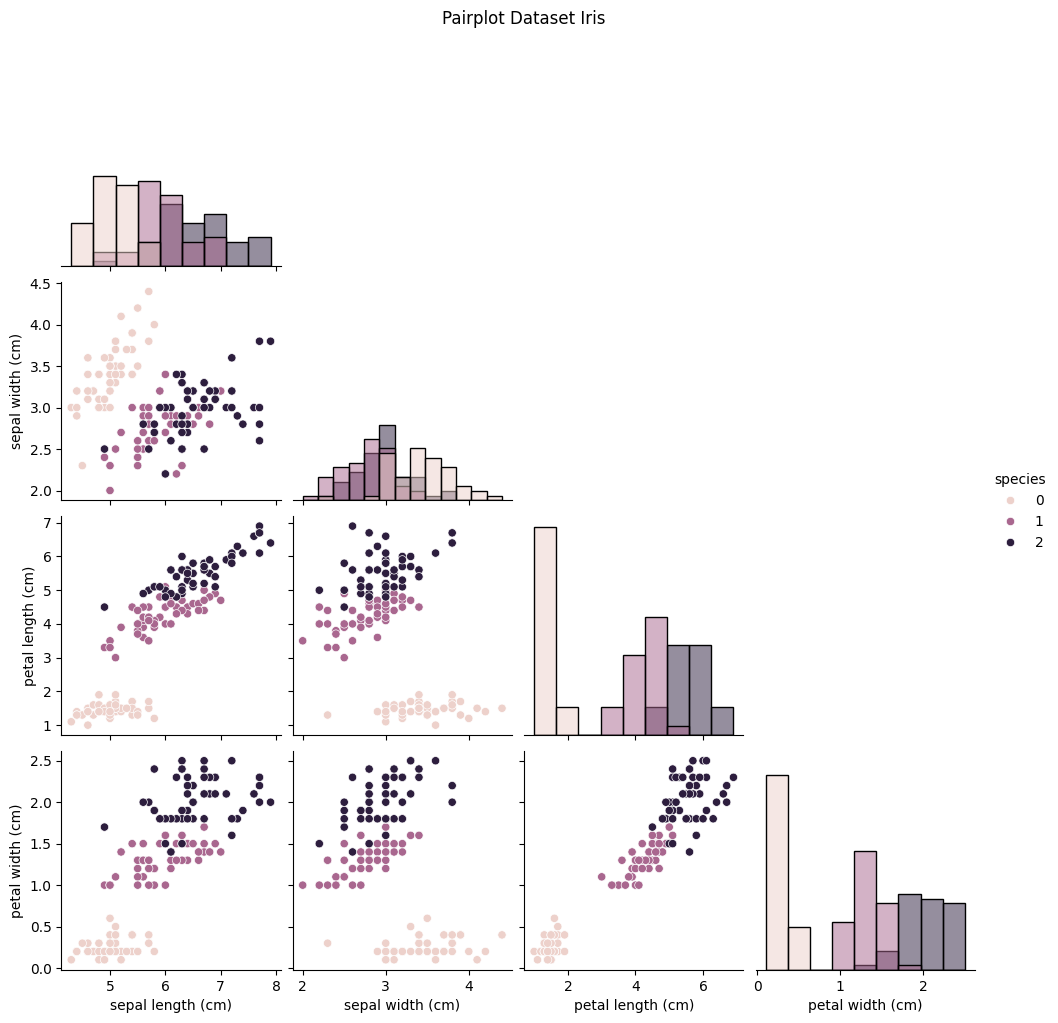

In [ ]:
# Data Visualization

## Pairplot
sns.pairplot(df, hue='species', diag_kind='hist', corner=True)
plt.suptitle("Pairplot Dataset Iris", y=1.02)
plt.show()


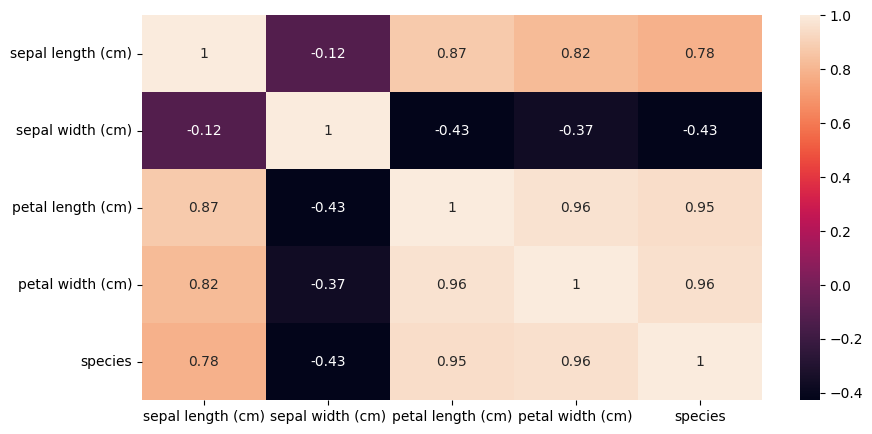

In [ ]:
## Heatmap

plt.figure(figsize=(10,5))
cor = df.corr(method='pearson')
sns.heatmap(cor,annot=True)
plt.show()

**6. Splitting Data**

In [ ]:
## Split Feature and Target
X = df.drop(columns=['species'])
y = df['species']

## Split into Train and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nNumber of train data:", X_train.shape[0])
print("Number of testing data:", X_test.shape[0])



Number of train data: 120
Number of testing data: 30


**7. Scaling Data**

In [ ]:
# Scaling Data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

## Transform testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

## Making Dataframe
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Load the Results
print("Train data after scaling:")
print(X_train_scaled_df.head())

print("\nTesting data after scaling:")
print(X_test_scaled_df.head())

Train data after scaling:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -1.473937          1.203658          -1.562535         -1.312603
1          -0.133071          2.992376          -1.276006         -1.045633
2           1.085898          0.085709           0.385858          0.289218
3          -1.230143          0.756479          -1.218701         -1.312603
4          -1.717731          0.309299          -1.390618         -1.312603

Testing data after scaling:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.354517         -0.585060           0.557775          0.022248
1          -0.133071          1.650837          -1.161395         -1.179118
2           2.304867         -1.032239           1.818500          1.490583
3           0.232620         -0.361470           0.443164          0.422703
4           1.207795         -0.585060           0.615081          0.289218


**8. Modelling**

In [ ]:
## 1.  SVM Modelling

### Train Model
svm_model = SVC(kernel='linear')  # Anda bisa mengganti kernel misalnya dengan 'rbf' atau 'poly' jika perlu
svm_model.fit(X_train_scaled, y_train)

# Predict Test Data
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy5 = accuracy_score(y_test, y_pred_svm)

print("Classification report SVM Model:")
print(f"Accuracy: {accuracy5 * 100:.2f}%")


Classification report SVM Model:
Accuracy: 96.67%


Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


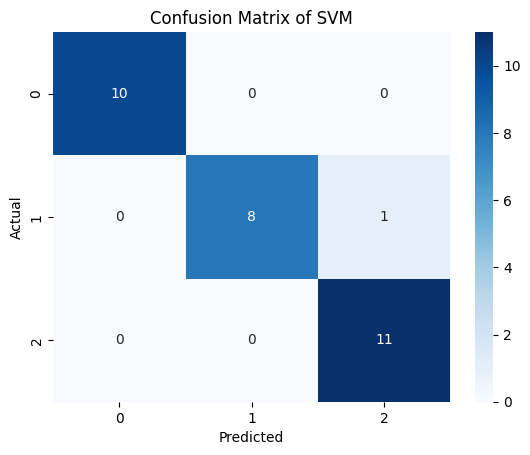

In [ ]:
### Load Configuration Matrix
conf_matrix3 = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix3)

### Load Configuration Matrix Heatmap of SVM Model
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of SVM')
plt.show()

In [ ]:
## 2.  KNN Modelling

### Train model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

### Load the Accuracy
y_pred_KNN = knn.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred_KNN)

### Load the Results
print("Calssification Report KNN Model:")
print(f"Accuracy: {accuracy1 * 100:.2f}%")

Calssification Report KNN Model:
Accuracy: 100.00%


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


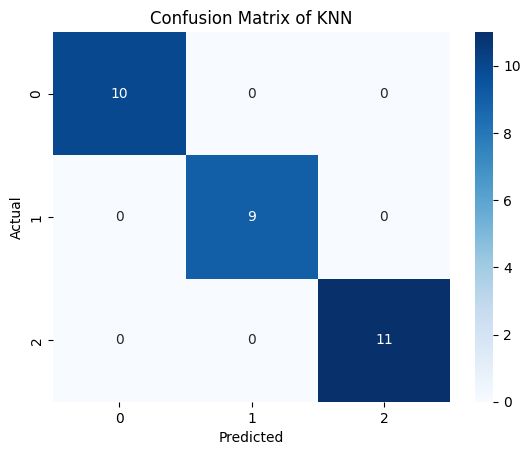

In [ ]:
### Load the COnfiguration Matrix of KNN Modelling

conf_matrix2 = confusion_matrix(y_test, y_pred_KNN)
print("Confusion Matrix:")
print(conf_matrix2)

sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of KNN')
plt.show()

In [ ]:
## 3. Decision Tree Model

### Initialize Decision Tree classifier
DT = DecisionTreeClassifier(random_state=42)

### Train the model
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
### Predict and Evaluate
y_pred_DT = DT.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred_DT)

print("Classification Report Decision Tree Model:")
print(f"Accuracy: {accuracy2 * 100:.2f}%")

Classification Report Decision Tree Model:
Accuracy: 100.00%


In [ ]:
### Configuration Matrix of Decision Tree Model
conf_matrix1 = confusion_matrix(y_test, y_pred_DT)
print("Confusion Matrix:")
print(conf_matrix1)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


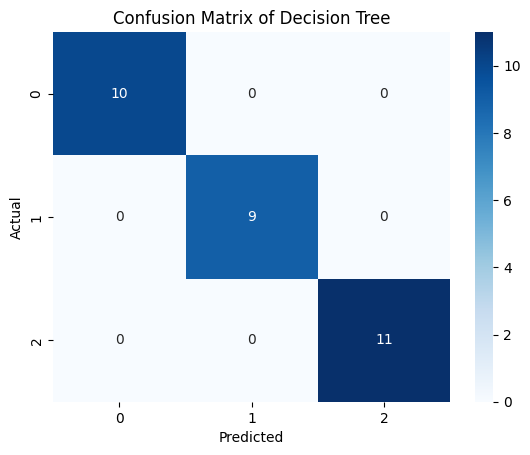

In [ ]:
### Configuration Matrix Heatmap of Decision Tree Model

sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Decision Tree')
plt.show()